<a href="https://colab.research.google.com/github/gilangalfa/Data-Mining-S4/blob/main/Apple_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediksi Kualitas Apel untuk Industri Apel

#**Import Library**

**Core Library**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

**Library untuk Splitting Data**

In [2]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [3]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

##### sec lib

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow import keras

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

##**Business Understanding**

###**Business Objective**
Tujuan dataset ini untuk memungkinkan berbagai pihak dalam industri apel untuk meningkatkan kualitas produk, efisiensi operasi, dan profitabilitas. Hal ini dapat dicapai dengan memahami faktor-faktor yang mempengaruhi kualitas apel, mengembangkan varietas baru yang unggul, menerapkan praktik budidaya yang optimal, dan meningkatkan efisiensi rantai pasokan.
###**Assess Situation**
Untuk mencari kualitas apel terbaik dari sekian banyaknya apel.
###**Data Mining Goals**
Tujuan yang ingin dicapai dari dataset ini adalah menemukan berapa banyak kualitas apel yang tinggi dari sekian banyak apel yang diuji coba dan untuk meningkatkan kualitas dan keberlanjutan industri apel.
###**Project Plan**
Rencana proyek untuk menganalisis dataset ini dimulai dengan memahami faktor-faktor yang mempengaruhi kualitas apel, hubungan antar atribut, dan variabilitasnya. Menyilangkan varietas unggul dengan karakteristik yang diinginkan untuk meningkatkan kualitas dan daya saing. Setelah itu mengembangkan praktik budidaya optimal berdasarkan data untuk meningkatkan hasil panen dan kualitas apel.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Dataset tersebut merupaka dataset yang diambil dari situs www.Kaggle.com dengan tema Apple Quality https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality

In [6]:
df = pd.read_csv("apple_quality.csv")
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


##**Describe Data**

####Informasi Dasar

In [7]:
df.shape

(4001, 9)

Pada dataset diatas memiliki jumlah total 4001 barisan dengan kolom yang berjumlah 9.

####Informasi Lanjutan

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


1. Kolom A_id
  - Jumlah barisan = 4000
  - Type Data = Float
2. Size
  - Jumlah barisan = 4000
  - Type Data = Float
3. Weight
  - Jumlah barisan = 4000
  - Type Data = Float
4. Sweetness
  - Jumlah barisan = 4000
  - Type Data = Float
5.  Crunchiness
  - Jumlah barisan = 4000
  - Type Data = Float
6. Juiciness
  - Jumlah barisan = 4000
  - Type Data = Float
7. Ripeness
  - Jumlah barisan = 4000
  - Type Data = Float
8. Acidity
  - Jumlah barisan = 4001
  - Type Data = Object
9. Quality
  - Jumlah barisan = 4000
  - Type Data = Object

####Informasi Statistik Deskriptif

In [9]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


1. A_id merupakan ID unik untuk setiap sampel
2. Size merupakan ukuran sampel
3. Weight merupakan berat sampel
4. Sweetness merupakan tingkat kemanisan sampel
5. Crunchiness merupakan tingkat kerenyahan sampel
6. Juiciness merupakan tingkat kerenyahan sampel
7. Ripeness merupakan tingkat kematangan sampel
8. Acidity merupakan tingkat keasaman sampel
9. Quality merupakan kualitas sampel

##**Exploratory Data Analysis**

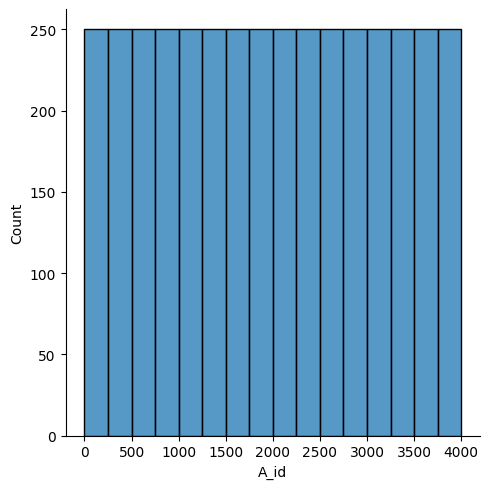

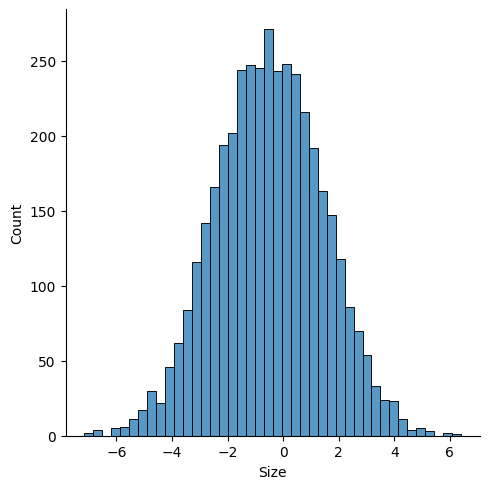

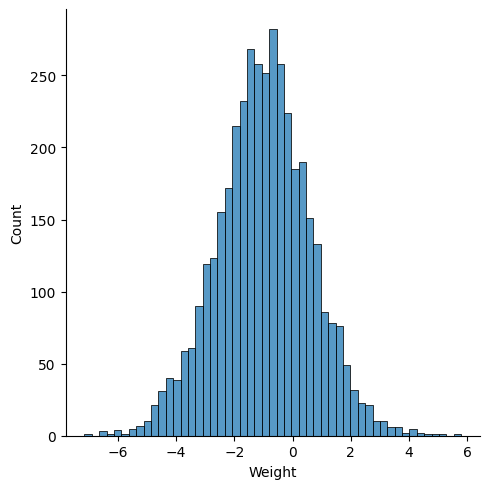

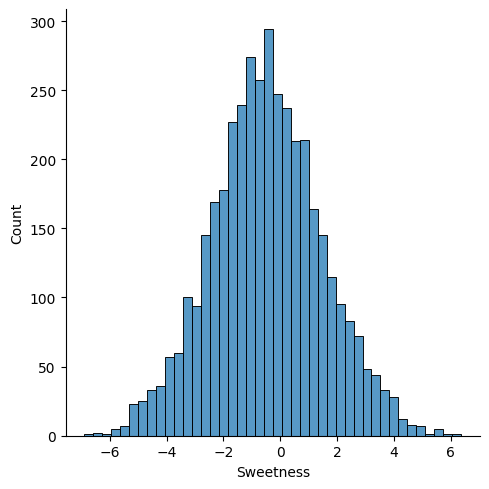

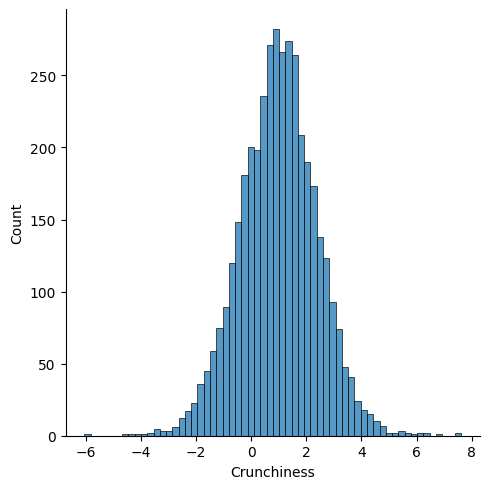

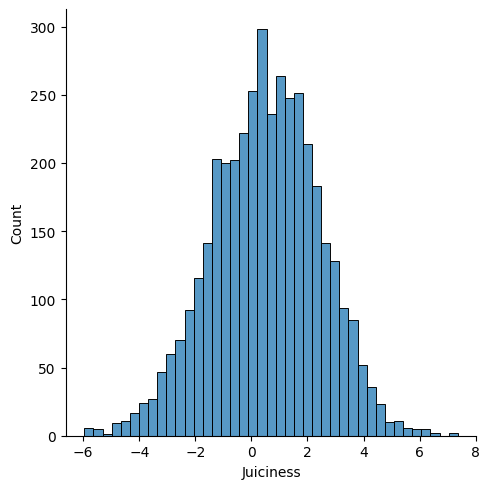

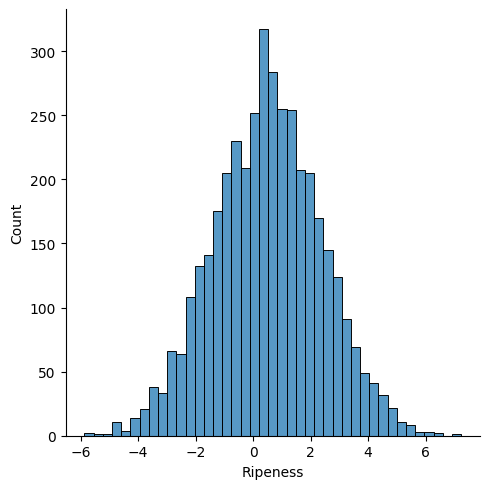

In [10]:
for col in df.select_dtypes(include=['float64']):
    sns.displot(data=df, x=col, kind="hist")

A. A_id
B. Size
C. Weight
D. Sweetness
E. Crunchiness
F. Juiciness
G. Ripeness

Kolom A tidak akan terpengaruh oleh kolom lain, sedangkan kolom B-G memiliki peluang untuk saling berpengaruh negatif maupun positif tergantung dari apel tersebut.

<ipython-input-11-8e095625a53f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


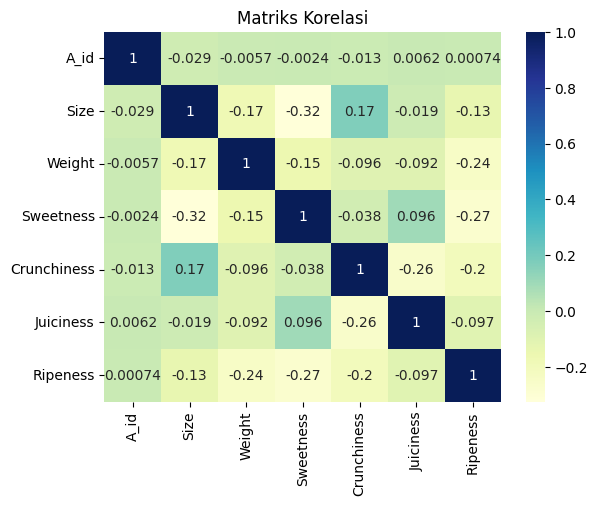

In [11]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Matriks Korelasi")
plt.show()

Kode ini menghitung dan memvisualisasi matriks korelasi data. Matriks korelasi menunjukkan hubungan antar kolom.

##**Verify Data Quality**

####Missing Values

In [12]:
df.isnull().any()

A_id            True
Size            True
Weight          True
Sweetness       True
Crunchiness     True
Juiciness       True
Ripeness        True
Acidity        False
Quality         True
dtype: bool

Terdapat missing values di hampir keseluruhan kolom di dalam dataset kecuali kolom Acidity.

####Outliers Values

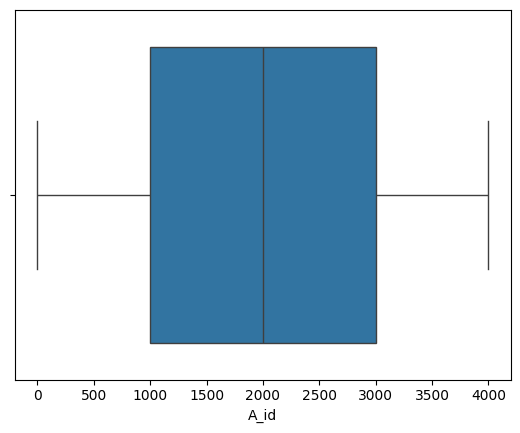

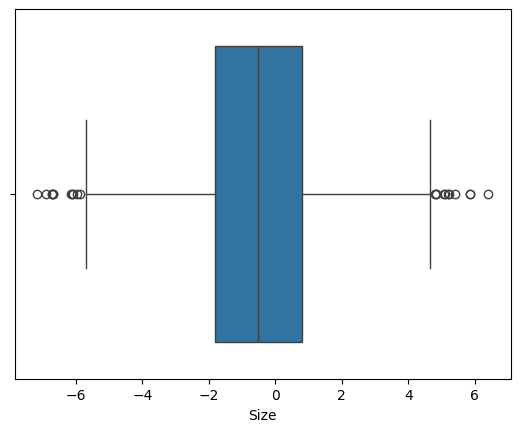

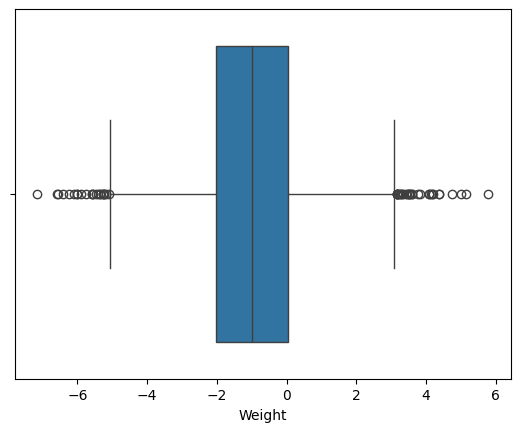

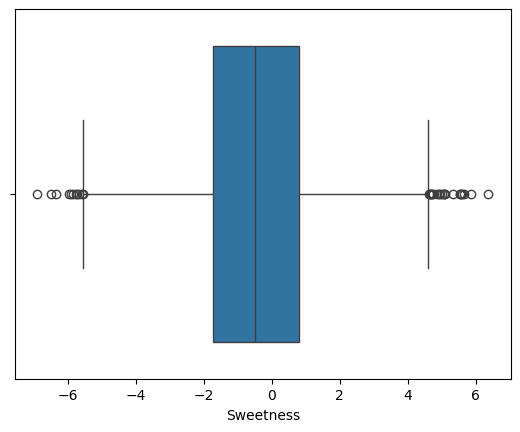

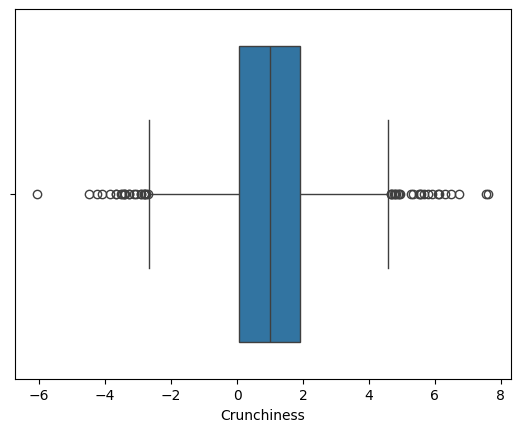

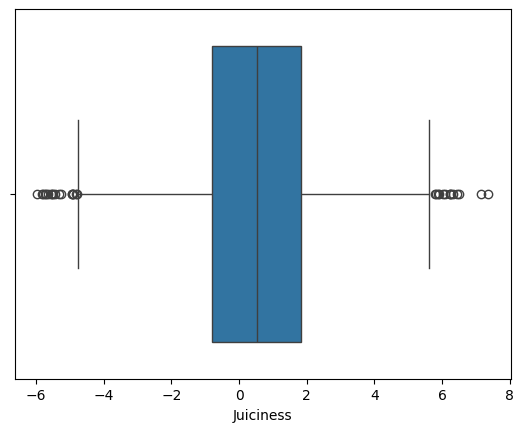

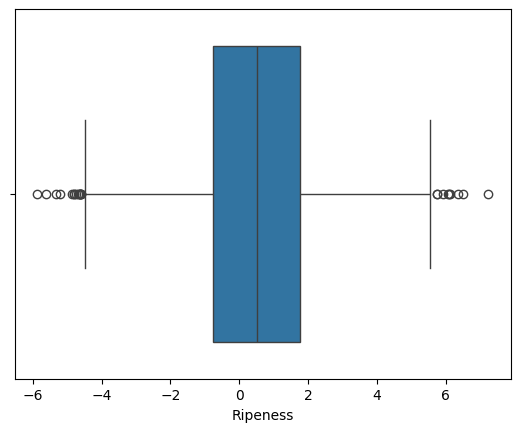

In [13]:
for col in df.select_dtypes(include=['float64']):
    sns.boxplot(data=df, x=col)
    plt.show()

Terdapat outliers pada hampir semua kolom kecuali A_id.

####Duplicated Values

In [14]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3996    False
3997    False
3998    False
3999    False
4000    False
Length: 4001, dtype: bool

Dari kolom diatas, terlihat tidak ada data yang terduplikasi.

####Inconsistent Values / Noise (Optional)

In [15]:
for col in df.select_dtypes(include=['object']):
    unique_values = set(df[col].unique())
    for value in unique_values:
        if not isinstance(value, str) or value == '':
            print(f"Nilai tidak konsisten di kolom {col}: {value}")

Nilai tidak konsisten di kolom Quality: nan


Tidak ada nilai yang tidak konsisten.

#**DATA PREPARATION**

##**Data Cleaning**

####Penanganan Missing Values

In [16]:
df = df.drop(4000)

In [17]:
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [18]:
print((df.isna().sum() / len(df)) * 100)

A_id           0.0
Size           0.0
Weight         0.0
Sweetness      0.0
Crunchiness    0.0
Juiciness      0.0
Ripeness       0.0
Acidity        0.0
Quality        0.0
dtype: float64


Nilai kosong pada A_id

In [19]:
df[df['A_id'].isnull()]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality


Nilai kosong pada Size

In [20]:
df[df['Size'].isnull()]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality


Nilai kosong pada Weight

In [21]:
df[df['Weight'].isnull()]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality


Nilai kosong pada Sweetness

In [22]:
df[df['Sweetness'].isnull()]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality


Nilai kosong pada Crunchiness

In [23]:
df[df['Crunchiness'].isnull()]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality


Nilai kosong pada Juiciness

In [24]:
df[df['Juiciness'].isnull()]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality


Nilai kosong pada Ripeness

In [25]:
df[df['Ripeness'].isnull()]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality


Nilai kosong pada Quality

In [26]:
df[df['Quality'].isnull()]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality


In [27]:
df = df.dropna()

####Penanganan Duplicated Values

In [28]:
df[df.duplicated()]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality


Berdasarkan data di atas, dapat disimpulkan bahwa tidak ada nilai yang duplikat.

####Penanganan Outliers

In [29]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
A_id,0.000
Size,0.550
Weight,1.350
Sweetness,0.800
Crunchiness,1.175
Juiciness,0.800
Ripeness,0.600


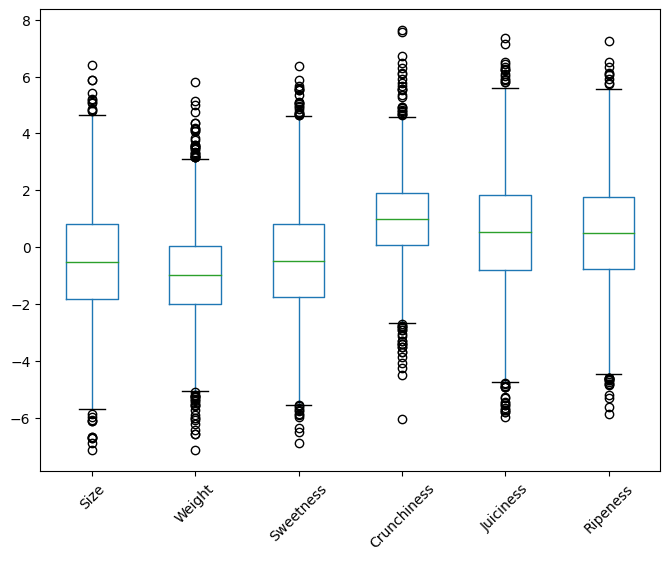

In [30]:
boxplot = df.drop('A_id', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#####**Pengecekkan Ulang**

In [31]:
def imputate(feature):

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width * IQR)
    upper_whisker = Q3 + (whisker_width * IQR)
    df[feature]=np.where(df[feature]>upper_whisker,upper_whisker,np.where(df[feature]<lower_whisker,lower_whisker,df[feature]))

imputate('Size')
imputate('Weight')
imputate('Sweetness')
imputate('Crunchiness')
imputate('Juiciness')
imputate('Ripeness')

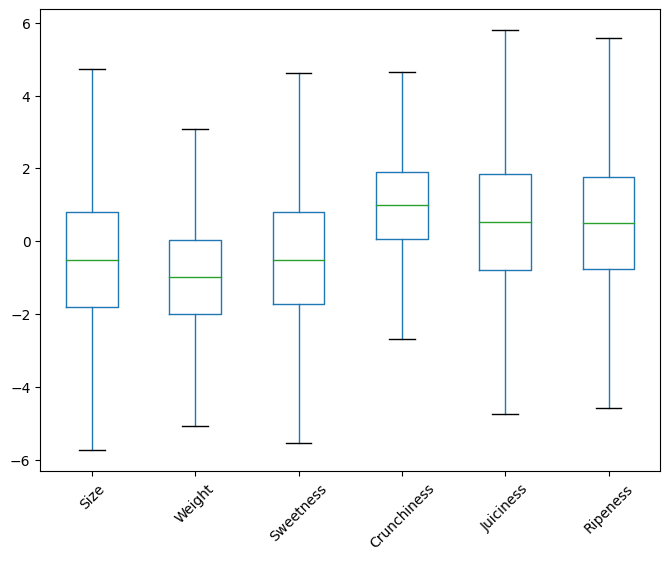

In [32]:
boxplot = df.drop('A_id', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [33]:
def categorize_sweet(sweet):
    if sweet < -1.8:
        return 'Kurang Manis'
    elif -1.8 <= sweet < 0.9:
        return 'Manis'
    else:
        return 'Sangat Manis'

df['SweetCategory'] = df['Sweetness'].apply(categorize_sweet)

###**Pengecekkan Hasil**

In [34]:
df.head(50)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,SweetCategory
0,0.0,-3.970049,-2.512336,4.612442,-1.012009,1.844900,0.329840,-0.491590483,good,Sangat Manis
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good,Sangat Manis
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad,Manis
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good,Sangat Manis
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good,Manis
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad,Kurang Manis
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good,Manis
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good,Sangat Manis
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad,Sangat Manis
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,bad,Kurang Manis


Penambahan kolom baru yang diberi nama SweetCategory dari hasil rekayasa fitur pada kolom Sweetness.Kolom tersebut dilakukan pengkategorian rasa manis dengan tingkat rasa dari kurang manis hingga ke sangat manis.

#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [35]:
df_corr = df.corr(numeric_only=True)
df_corr

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
A_id,1.000000,-0.028722,-0.005954,-0.001819,-0.013516,0.005579,0.000252
Size,-0.028722,1.000000,-0.166974,-0.324412,0.169820,-0.019437,-0.135910
Weight,-0.005954,-0.166974,1.000000,-0.152070,-0.095068,-0.092135,-0.243678
Sweetness,-0.001819,-0.324412,-0.152070,1.000000,-0.033874,0.095436,-0.273578
Crunchiness,-0.013516,0.169820,-0.095068,-0.033874,1.000000,-0.257884,-0.200391
Juiciness,0.005579,-0.019437,-0.092135,0.095436,-0.257884,1.000000,-0.098975
Ripeness,0.000252,-0.135910,-0.243678,-0.273578,-0.200391,-0.098975,1.000000


Menurut saya, dalam dataset yang saya gunakan ini memiliki kolom yang relevan semua.

#**Data Transformation**

###**Mapping**

In [36]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,SweetCategory
0,0.0,-3.970049,-2.512336,4.612442,-1.012009,1.844900,0.329840,-0.491590483,good,Sangat Manis
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good,Sangat Manis
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad,Manis
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good,Sangat Manis
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good,Manis


In [37]:

df['Quality'] = df['Quality'].map({'good':1,'bad':0}).astype('int64')
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,SweetCategory
0,0.0,-3.970049,-2.512336,4.612442,-1.012009,1.844900,0.329840,-0.491590483,1,Sangat Manis
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1,Sangat Manis
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0,Manis
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1,Sangat Manis
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1,Manis


Mapping dilakukan pada kolom Quality dengan mengubah nilai Manis dan Sangat manis menjadi 0 dan 1.

###**Encoding**

In [38]:
df = pd.get_dummies(df)

###**Pengecekkan Hasil**

In [39]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Quality,Acidity_-0.000635882,Acidity_-0.001593958,...,Acidity_6.17198647,Acidity_6.184145401,Acidity_6.267182876,Acidity_6.348869952,Acidity_6.70139469,Acidity_7.193374375,Acidity_7.404736238,SweetCategory_Kurang Manis,SweetCategory_Manis,SweetCategory_Sangat Manis
0,0.0,-3.970049,-2.512336,4.612442,-1.012009,1.844900,0.329840,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,1,0,0,...,0,0,0,0,0,0,0,0,1,0


Encoding dilakukan supaya setiap kategori memiliki kolomnya tersendiri dan menjadi nilai numerik.

In [40]:
df.to_csv('Data Cleaned.csv')

https://drive.google.com/file/d/1XKS5xJw6F8I39-MIE56hdFhcZECI9dIC/view?usp=drive_link

#**Inisiasi Variabel untuk menyimpan Dataframe**

In [41]:
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Quality,Acidity_-0.000635882,Acidity_-0.001593958,...,Acidity_6.17198647,Acidity_6.184145401,Acidity_6.267182876,Acidity_6.348869952,Acidity_6.70139469,Acidity_7.193374375,Acidity_7.404736238,SweetCategory_Kurang Manis,SweetCategory_Manis,SweetCategory_Sangat Manis
0,0.0,-3.970049,-2.512336,4.612442,-1.012009,1.844900,0.329840,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,1,0,0,...,0,0,0,0,0,0,0,0,0,1


#**Modelling Predict**

###**Pre-Processing**

#####**Split Data**

In [42]:
x = df.drop('Quality', axis=1)
y = df['Quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#####**Normalisasi Data**

In [43]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

MinMaxScaler digunakan untuk melakukan penskalaan fitur ke rentang yang ditentukan, biasanya antara 0 dan 1.

###**Build and Train Model**

#####**Gaussian Naive Bayes**

In [45]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

#####**K-Nearest Neighbor**

In [46]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

#####**Decision Tree**

In [47]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

###**Begins and Compare Predict**

In [48]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

In [49]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

In [50]:
combined_data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity_-0.000635882,Acidity_-0.001593958,Acidity_-0.003109107,...,Acidity_6.70139469,Acidity_7.193374375,Acidity_7.404736238,SweetCategory_Kurang Manis,SweetCategory_Manis,SweetCategory_Sangat Manis,Quality,gnb_prediction,knn_prediction,dtc_prediction
0,555.0,3.099411,-1.691561,-3.679364,0.963606,0.538102,1.660099,0,0,0,...,0,0,0,1,0,0,1,1,1,1
1,3491.0,1.439788,-0.223976,-0.061449,1.412705,0.885641,-2.191811,0,0,0,...,0,0,0,0,1,0,0,1,1,1
2,527.0,1.206786,-0.508979,1.736207,1.301011,-0.556149,-1.332052,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,3925.0,-1.612077,-1.554690,2.250267,-0.155060,-1.435862,2.388755,0,0,0,...,0,0,0,0,0,1,1,1,1,1
4,2989.0,-1.962900,-0.506961,-2.388917,0.136195,-2.780126,1.623751,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [52]:
gnb_cm = confusion_matrix(y_test, gnb_pred)
knn_cm = confusion_matrix(y_test, knn_pred)
dtc_cm = confusion_matrix(y_test, dtc_pred)

In [53]:
gnb_report = classification_report(y_test, gnb_pred)
knn_report = classification_report(y_test, knn_pred)
dtc_report = classification_report(y_test, dtc_pred)

print("Gaussian Naive Bayes")
print(gnb_report)

print()
print("K Nearest Neighbor")
print(knn_report)

print()
print("Decision Tree Classifier")
print(dtc_report)

Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       593
           1       0.51      1.00      0.67       607

    accuracy                           0.51      1200
   macro avg       0.25      0.50      0.34      1200
weighted avg       0.26      0.51      0.34      1200


K Nearest Neighbor
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       593
           1       0.86      0.82      0.84       607

    accuracy                           0.84      1200
   macro avg       0.84      0.84      0.84      1200
weighted avg       0.84      0.84      0.84      1200


Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       593
           1       0.79      0.79      0.79       607

    accuracy                           0.79      1200
   macro avg       0.79      0.79      0.79      1200
weighte

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


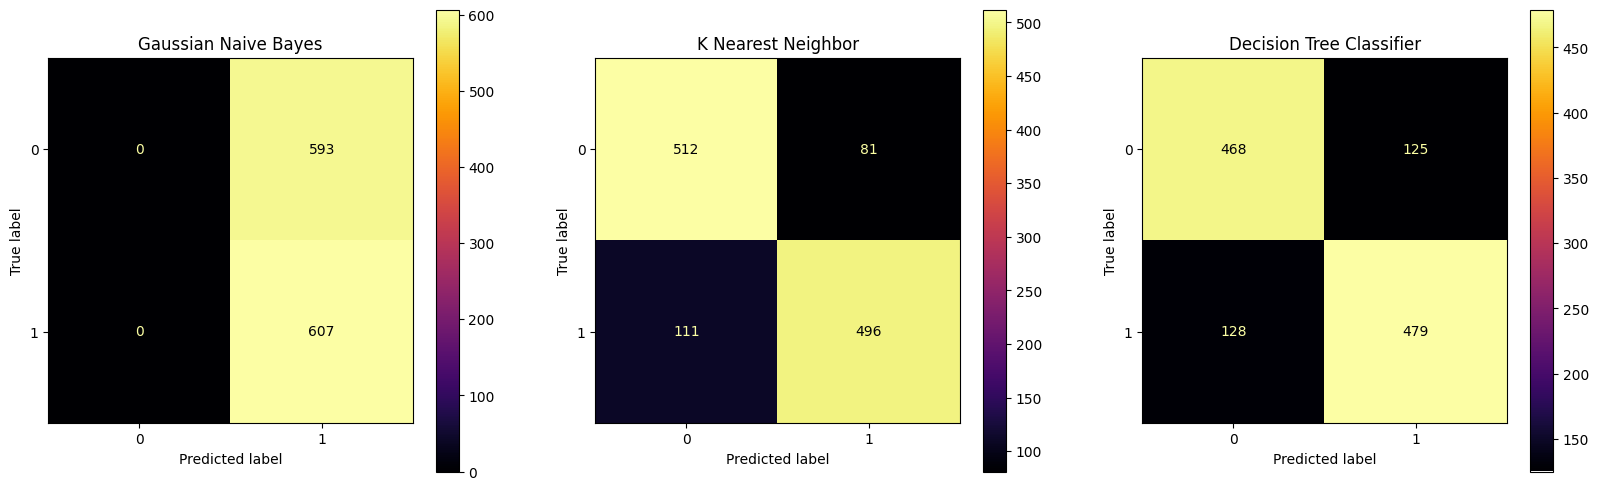

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

gnb_cm_display = ConfusionMatrixDisplay(gnb_cm).plot(ax=axes[0], cmap='inferno')
gnb_cm_display.ax_.set_title('Gaussian Naive Bayes')

knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm).plot(ax=axes[1], cmap='inferno')
knn_cm_display.ax_.set_title('K Nearest Neighbor')

dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm).plot(ax=axes[2], cmap='inferno')
dtc_cm_display.ax_.set_title('Decision Tree Classifier')

plt.show()

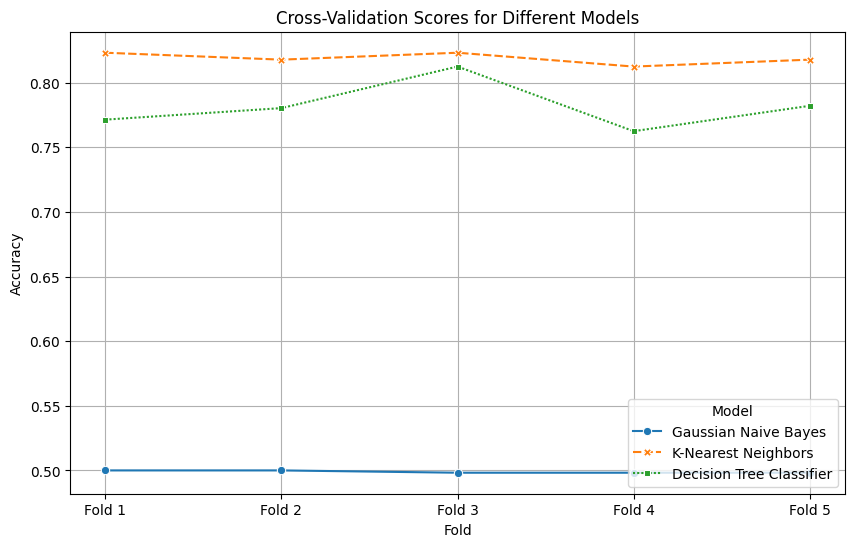

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()